# Students' exam results prediction

import of needed libraries

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

# warnings off
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

students = pd.read_csv('stud_math.csv')
display(students.head(10))
students.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

let see first of all range of students ages:

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

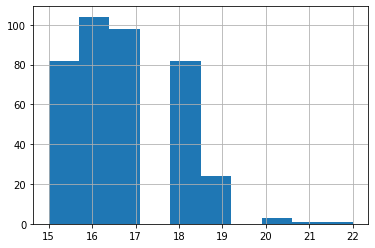

In [12]:
students.age.hist()
students.age.describe()

Without any calculation it seems that ages are in precentile range.

Let's look at parents' degreees:

Text(0.5, 1.0, "Father's degree")

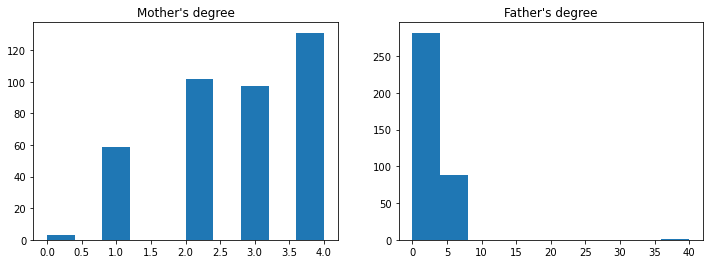

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(students['Medu'])
axes[0].set_title("Mother's degree")

axes[1].hist(students['Fedu'])
axes[1].set_title("Father's degree")

We can notice that Mother's degree column is in range, while Father's one has outerpoint.

In [24]:
students.Fedu.describe()

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

count    368.000000
mean       2.527174
std        1.074511
min        1.000000
25%        2.000000
50%        2.500000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

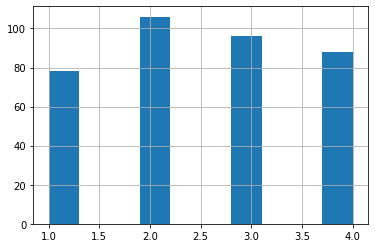

In [26]:
fedu_filltered = students.loc[(
    students['Fedu'] >= 1.0) & (students['Fedu'] <= 4.0)]
fedu_filltered.Fedu.hist()
fedu_filltered.Fedu.describe()

Fillter is used!

Text(0.5, 1.0, 'number of extracurricular failures')

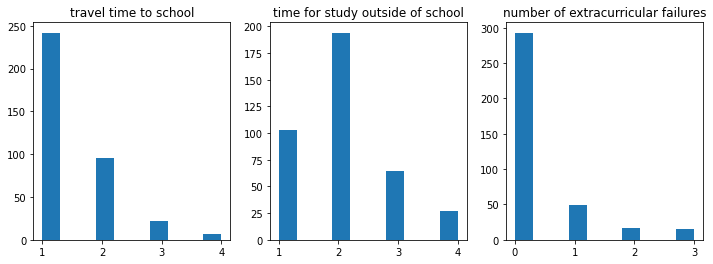

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].hist(students['traveltime'])
axes[0].set_title("travel time to school")

axes[1].hist(students['studytime'])
axes[1].set_title("time for study outside of school")

axes[2].hist(students['failures'])
axes[2].set_title("number of extracurricular failures")

All 3 listed and checked above are in their range (travel/studytime, failures). Moreover, as "studytime, granular" is same listed values of studytime multiplied by -3, it in precentile range.
Let's check columns of rated family relationship, students' freetime, time speand with friends, health and absences rate.

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

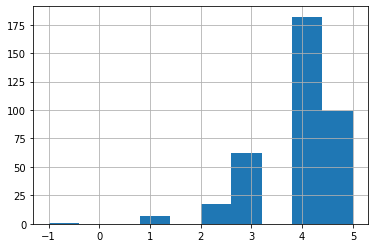

In [31]:
students.famrel.hist()
students.famrel.describe()

It seems that famrel has one mistake or unclear inform.

count    367.000000
mean       3.950954
std        0.891853
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

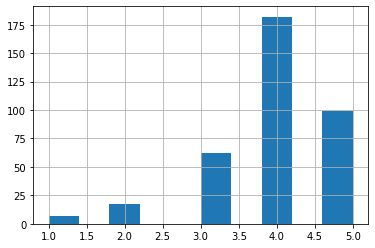

In [28]:
famrel_filltered = students.loc[(
    students['famrel'] >= 1.0) & (students['famrel'] <= 5.0)]
famrel_filltered.famrel.hist()
famrel_filltered.famrel.describe()

Text(0.5, 1.0, 'current state of health')

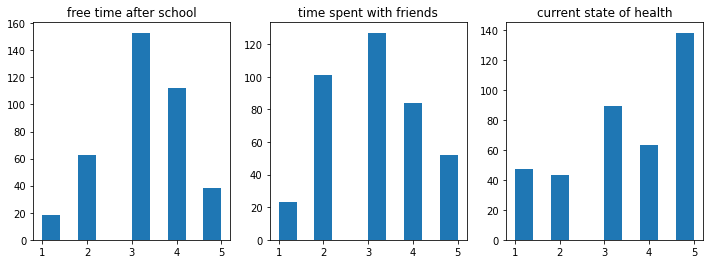

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].hist(students['freetime'])
axes[0].set_title("free time after school")

axes[1].hist(students['goout'])
axes[1].set_title("time spent with friends")

axes[2].hist(students['health'])
axes[2].set_title("current state of health")

All three of these columns are in their precentile range. Let see absences:

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

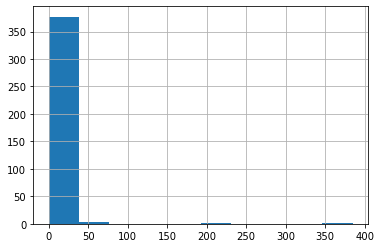

In [42]:
students.absences.hist()
students.absences.describe()

After swithing on our "common sense" we can understan that the value of absences as 385 it's quite impossible. And we will use the interquartile distance formula:

25th precentile: 0.0, 75th precentile: 8.0, IQR: 8.0,  Frames: [-12.0, 20.0].


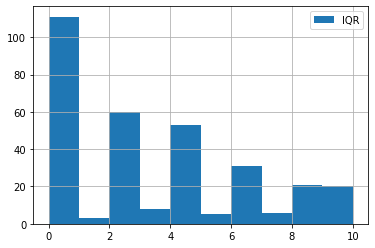

In [46]:
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
print('25th precentile: {},'.format(perc25), '75th precentile: {},'.format(perc75), "IQR: {}, ".format(IQR),
      "Frames: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

students.absences.loc[students.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].\
    hist(bins=10, range=(0, 10), label='IQR')

plt.legend()

Now let's try to find unique nominal values:

In [56]:
students.school = students.school.apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.school.value_counts()))
print("Met more than 10 times:", (students.school.value_counts() > 10).sum())
students.loc[:, ['school']].info()

,school
GP,349
MS,46


Met more than 10 times: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [62]:
students.sex = students.sex.apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.sex.value_counts()))
print("Met more than 10 times:", (students.sex.value_counts() > 10).sum())
students.loc[:, ['sex']].info()

,sex
F,208
M,187


Met more than 10 times: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [65]:
display(pd.DataFrame(students.address.value_counts()))
print("Met more than 10 times:", (students.address.value_counts() > 10).sum())
students.loc[:, ['address']].info()

,address
U,295
R,83


Met more than 10 times: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [54]:
display(pd.DataFrame(students.famsize.value_counts()))
print("Met more than 10 times:", (students.famsize.value_counts() > 10).sum())
students.loc[:, ['famsize']].info()

,famsize
GT3,261
LE3,107


Met more than 10 times: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [55]:
display(pd.DataFrame(students.Pstatus.value_counts()))
print("Met more than 10 times:", (students.Pstatus.value_counts() > 10).sum())
students.loc[:, ['Pstatus']].info()

,Pstatus
T,314
A,36


Met more than 10 times: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


School(GP, MS) samely as Sex, Address, Famsize and Pstatus have only two values.

In [72]:
students.Mjob = students.Mjob.apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                    else x if '(' not in x else x[:x.find('(')].strip())

In [74]:
display(pd.DataFrame(students.Mjob.value_counts()))
print("Met more than 10 times:", (students.Mjob.value_counts() > 10).sum())
students.loc[:, ['Mjob']].info()

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


Met more than 10 times: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [75]:
students.Fjob = students.Fjob.apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                    else x if '(' not in x else x[:x.find('(')].strip())
display(pd.DataFrame(students.Fjob.value_counts()))
print("Met more than 10 times:", (students.Fjob.value_counts() > 10).sum())
students.loc[:, ['Fjob']].info()

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


Met more than 10 times: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [81]:
students.reason = students.reason.apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                        else x if '(' not in x else x[:x.find('(')].strip())
display(pd.DataFrame(students.reason.value_counts()))
print("Met more than 10 times:", (students.reason.value_counts() > 10).sum())
students.loc[:, ['reason']].info()

,reason
course,137
home,104
reputation,103
other,34


Met more than 10 times: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [83]:
students.guardian = students.guardian.apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                            else x if '(' not in x else x[:x.find('(')].strip())
display(pd.DataFrame(students.guardian.value_counts()))
print("Met more than 10 times:", (students.guardian.value_counts() > 10).sum())
students.loc[:, ['guardian']].info()

,guardian
mother,250
father,86
other,28


Met more than 10 times: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [85]:
students.schoolsup = students.schoolsup.apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                              else x if '(' not in x else x[:x.find('(')].strip())
display(pd.DataFrame(students.schoolsup.value_counts()))
print("Met more than 10 times:", (students.schoolsup.value_counts() > 10).sum())
students.loc[:, ['schoolsup']].info()

,schoolsup
no,335
yes,51


Met more than 10 times: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [86]:
students.famsup = students.famsup.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
display(pd.DataFrame(students.famsup.value_counts()))
print("Met more than 10 times:", (students.famsup.value_counts()>10).sum())
students.loc[:, ['famsup']].info()

,famsup
yes,219
no,137


Met more than 10 times: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [88]:
students.paid = students.paid.apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                    else x if '(' not in x else x[:x.find('(')].strip())
display(pd.DataFrame(students.paid.value_counts()))
print("Met more than 10 times:", (students.paid.value_counts() > 10).sum())
students.loc[:, ['paid']].info()

,paid
no,200
yes,155


Met more than 10 times: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [89]:
students.activities = students.activities.apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                                else x if '(' not in x else x[:x.find('(')].strip())
display(pd.DataFrame(students.activities.value_counts()))
print("Met more than 10 times:", (students.activities.value_counts() > 10).sum())
students.loc[:, ['activities']].info()

,activities
yes,195
no,186


Met more than 10 times: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [90]:
students.nursery = students.nursery.apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                          else x if '(' not in x else x[:x.find('(')].strip())
display(pd.DataFrame(students.nursery.value_counts()))
print("Met more than 10 times:", (students.nursery.value_counts() > 10).sum())
students.loc[:, ['nursery']].info()

,nursery
yes,300
no,79


Met more than 10 times: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [91]:
students.higher = students.higher.apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                        else x if '(' not in x else x[:x.find('(')].strip())
display(pd.DataFrame(students.higher.value_counts()))
print("Met more than 10 times:", (students.higher.value_counts() > 10).sum())
students.loc[:, ['higher']].info()

,higher
yes,356
no,19


Met more than 10 times: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [92]:
students.internet = students.internet.apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                            else x if '(' not in x else x[:x.find('(')].strip())
display(pd.DataFrame(students.internet.value_counts()))
print("Met more than 10 times:", (students.internet.value_counts() > 10).sum())
students.loc[:, ['internet']].info()

,internet
yes,305
no,56


Met more than 10 times: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [93]:
students.romantic = students.romantic.apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                            else x if '(' not in x else x[:x.find('(')].strip())
display(pd.DataFrame(students.romantic.value_counts()))
print("Met more than 10 times:", (students.romantic.value_counts() > 10).sum())
students.loc[:, ['romantic']].info()

,romantic
no,240
yes,124


Met more than 10 times: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


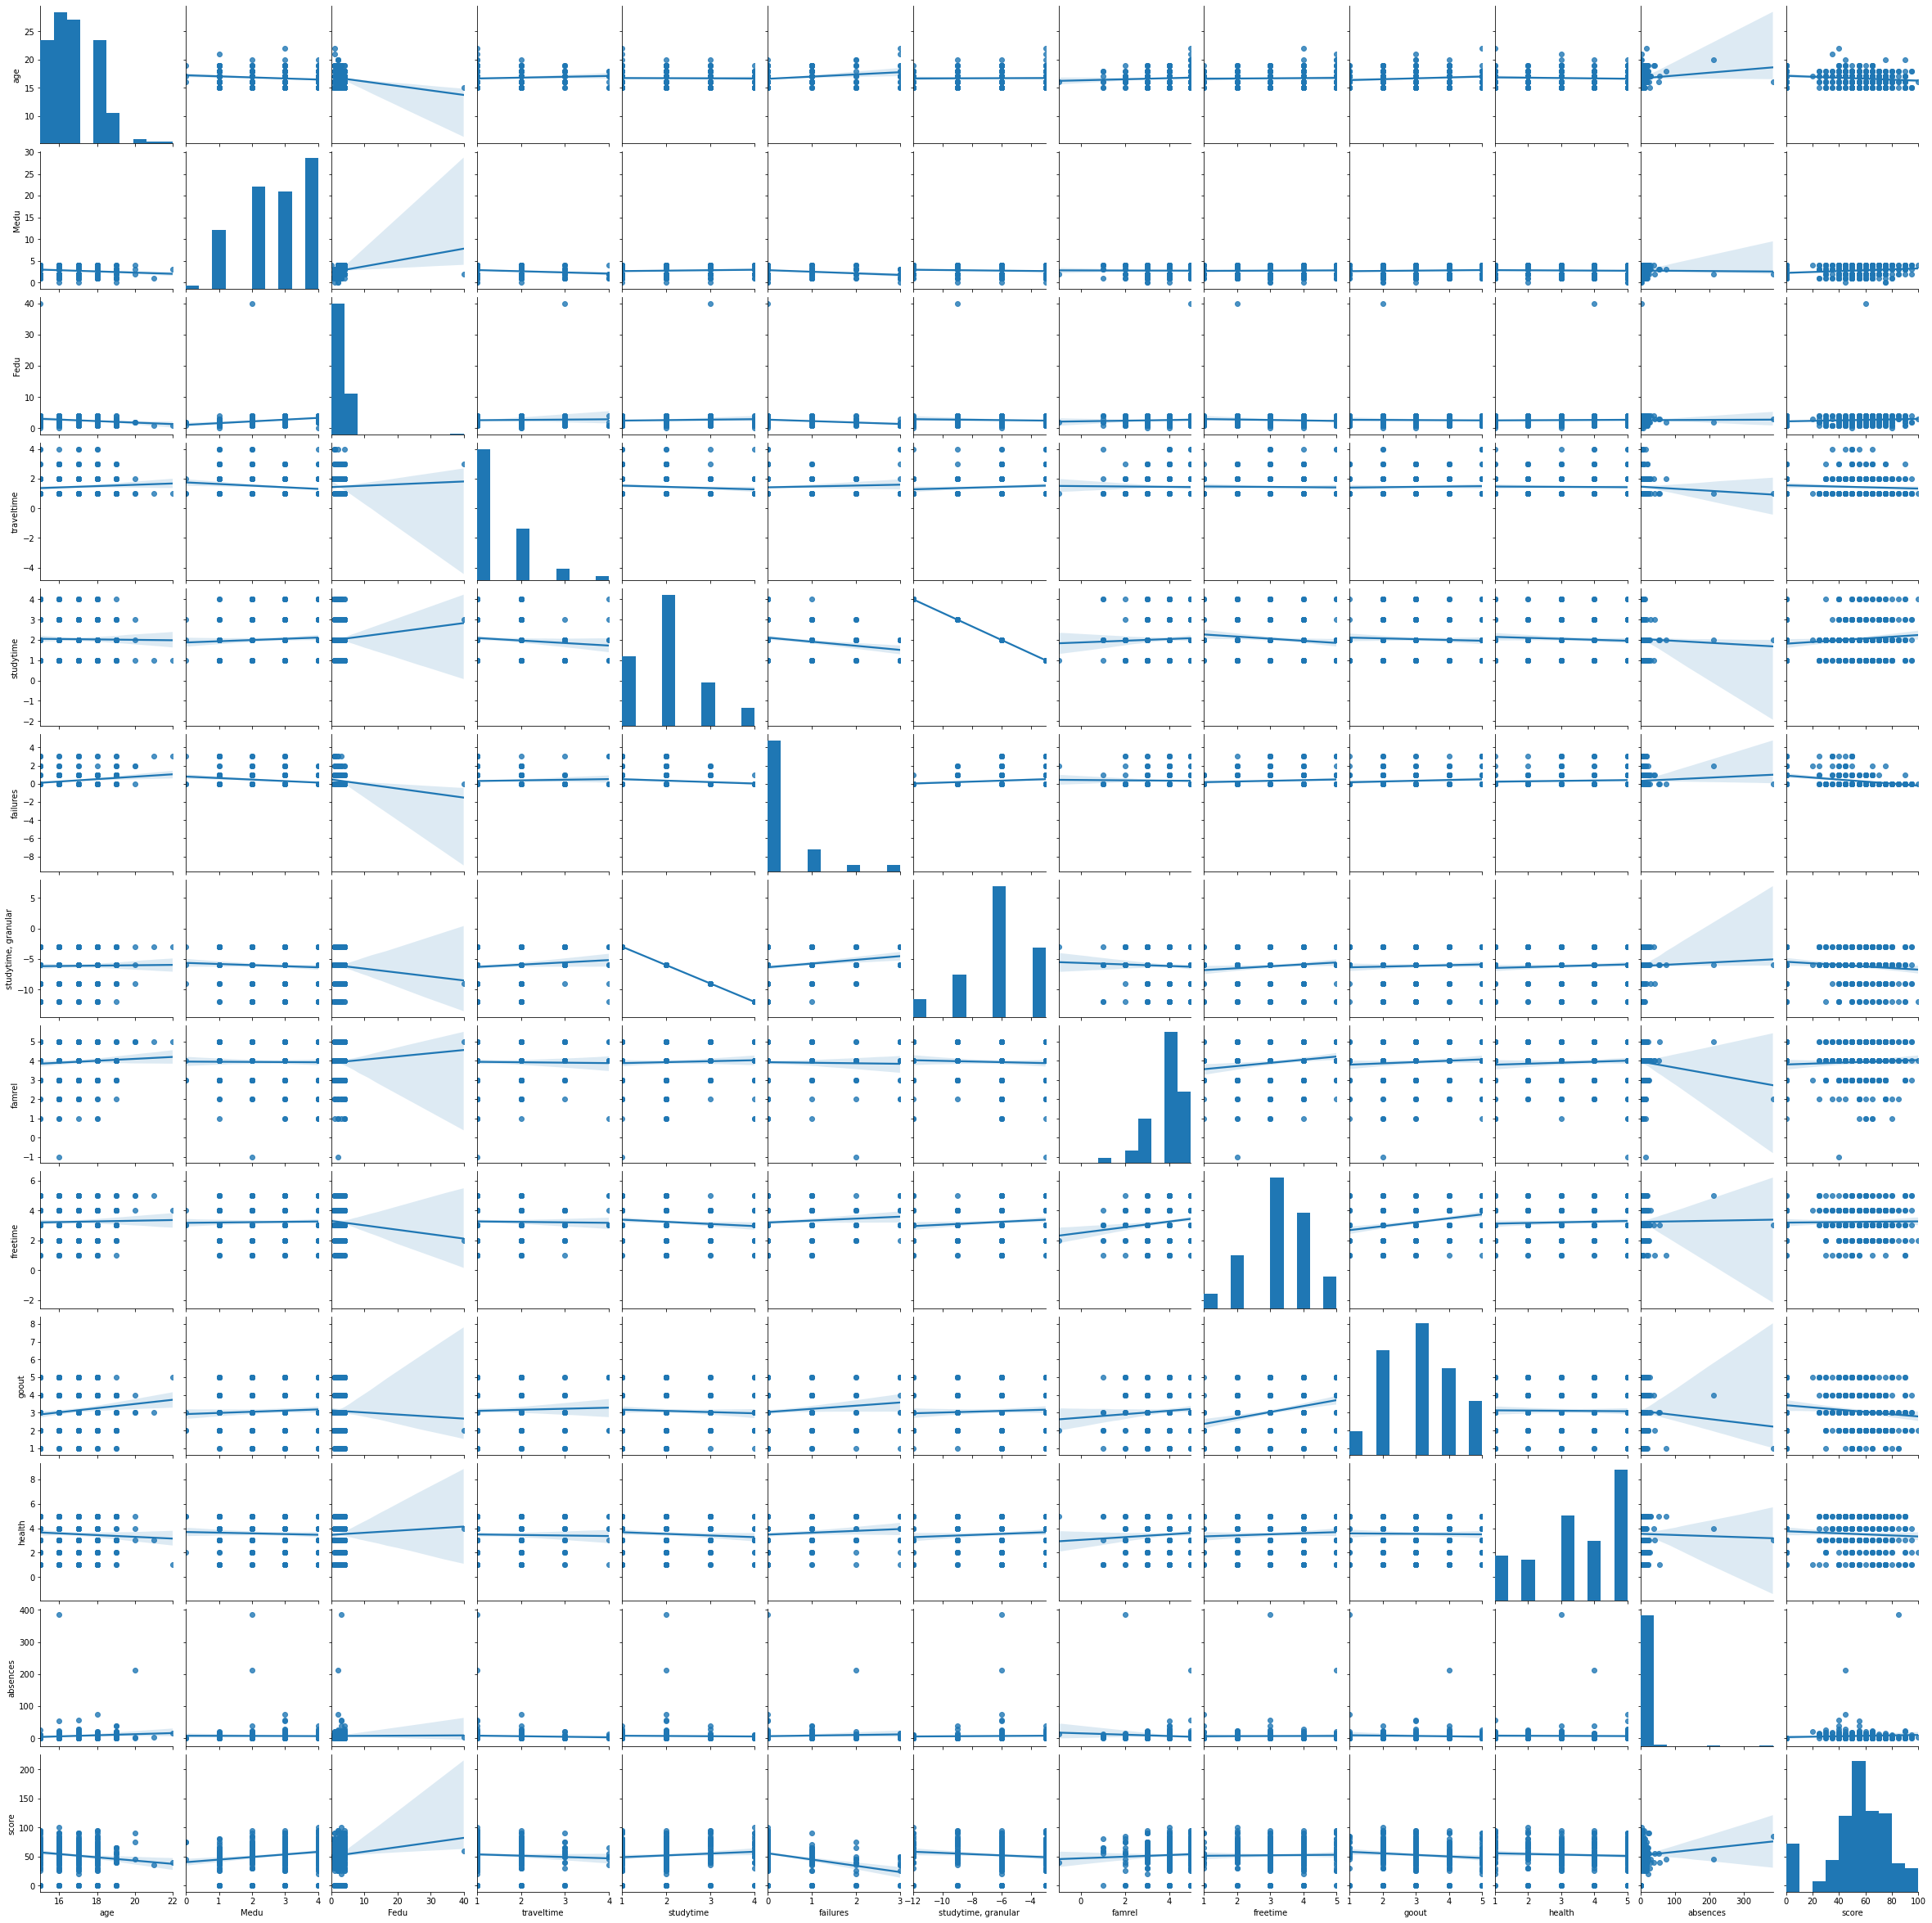

In [98]:
sns.pairplot(students, kind='reg')

In [99]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


There are no non-correlated variables with Score, but most of them are weak correlated values. Since the relationship between all variables gives an impact on the final score (but not one by one), it is difficult to remove them. 

In [105]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

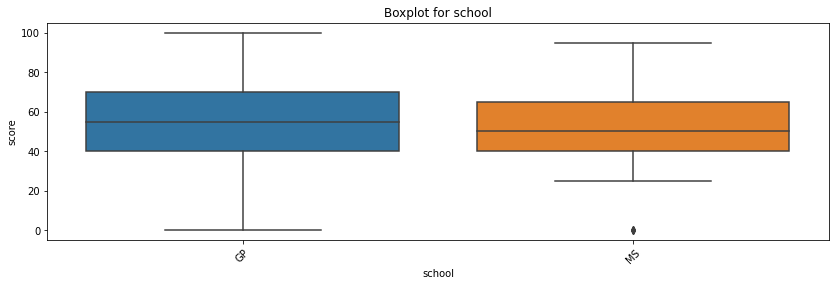

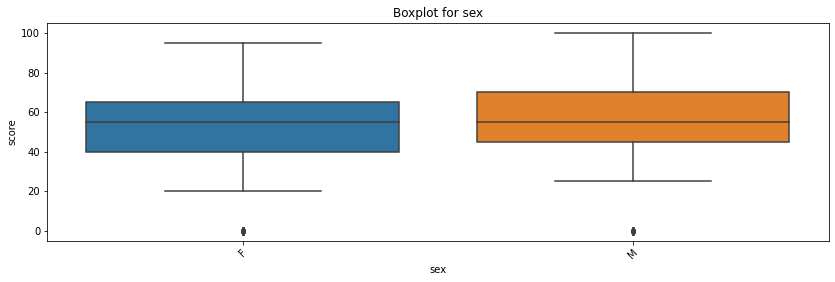

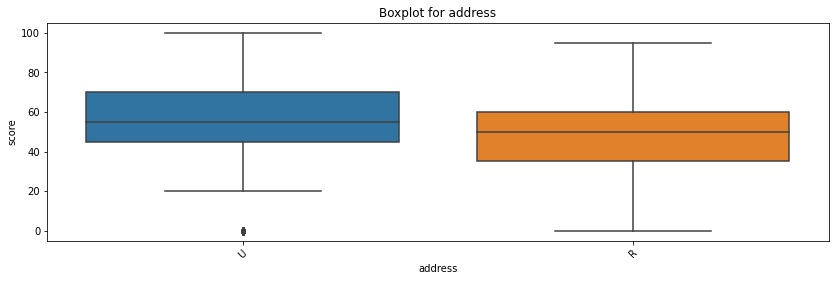

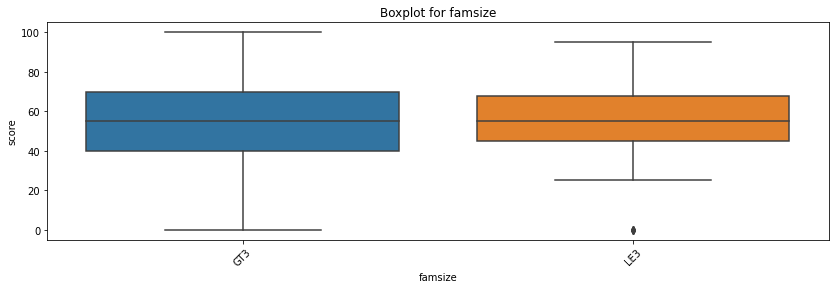

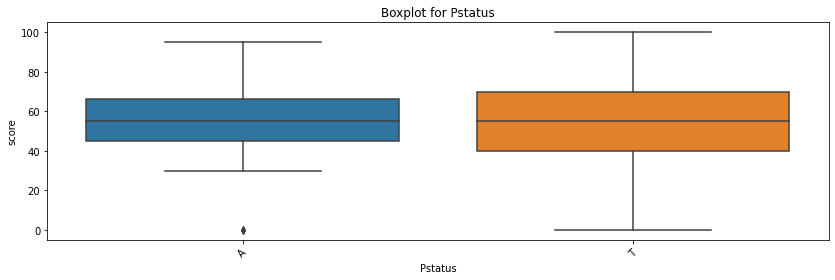

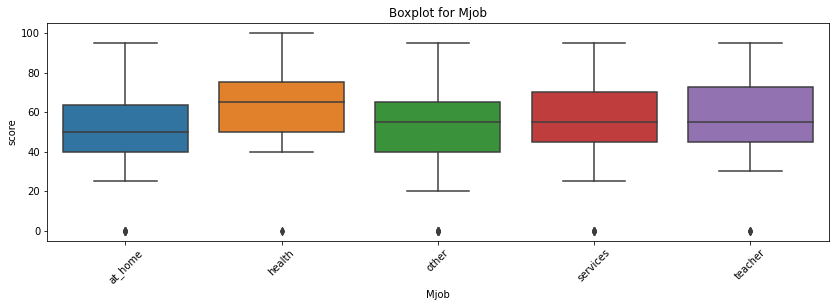

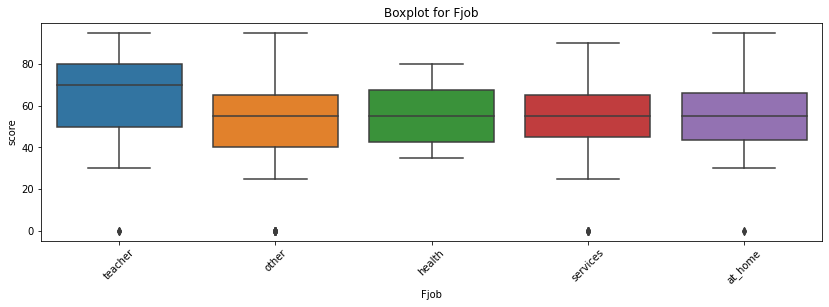

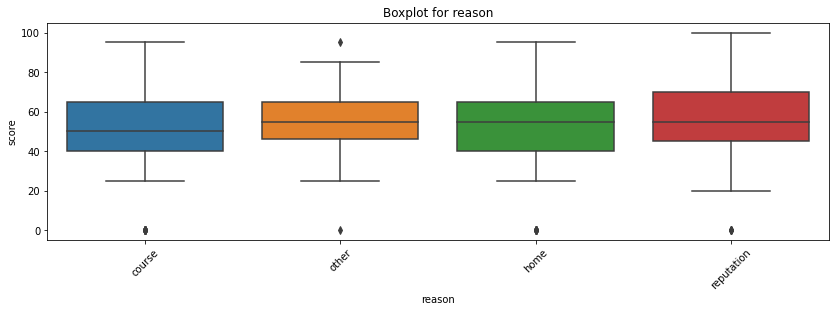

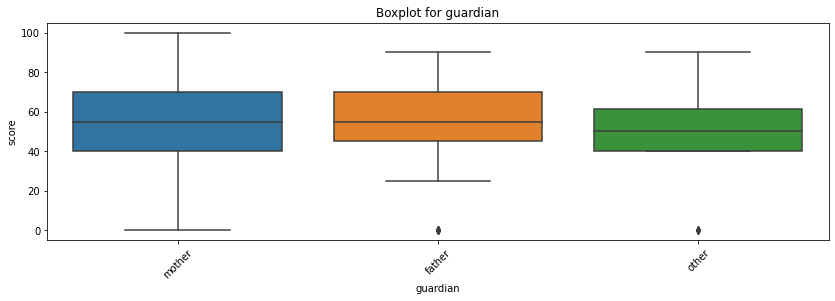

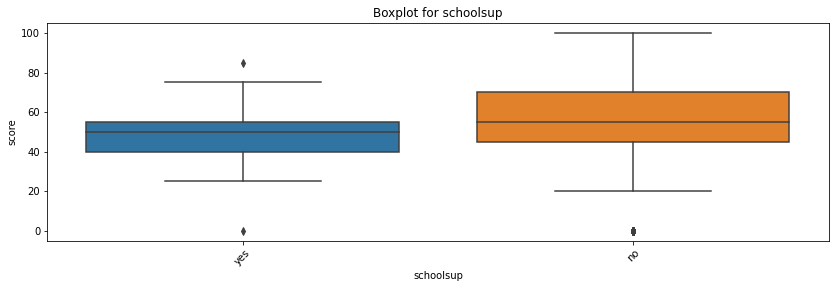

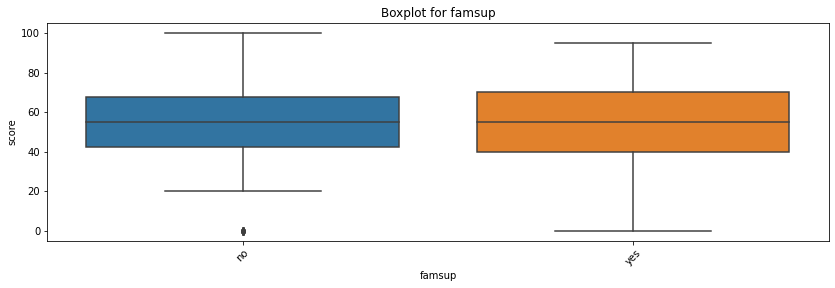

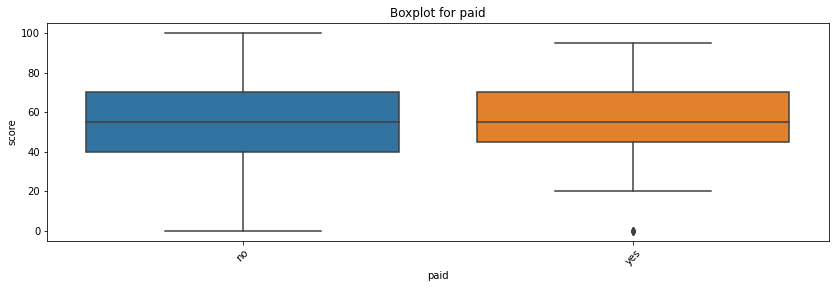

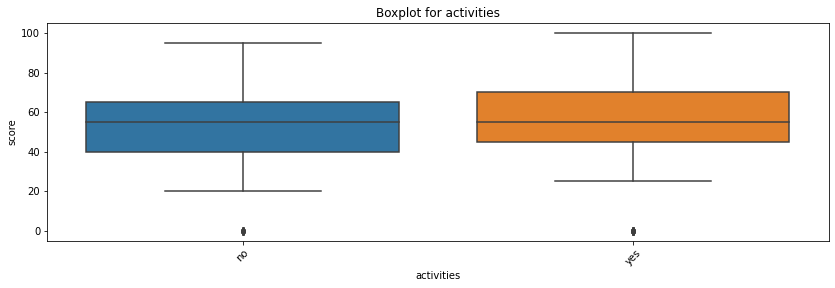

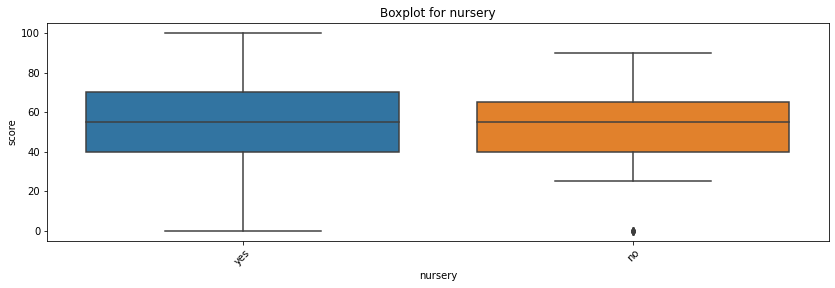

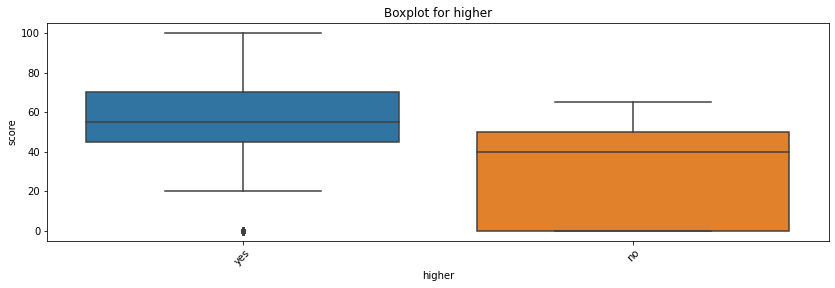

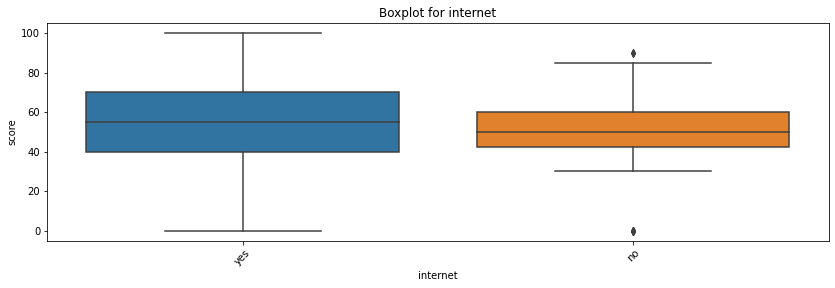

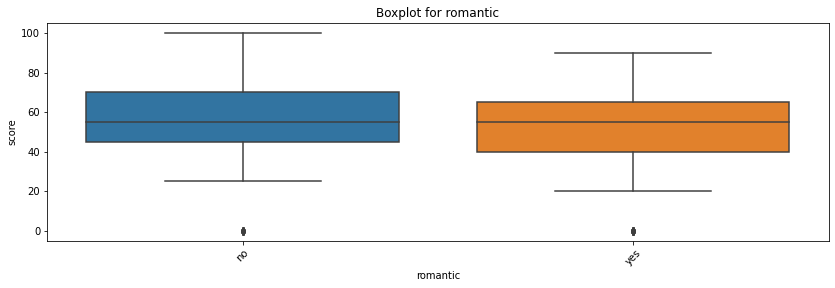

In [106]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [114]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [118]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


In [127]:
students_for_model = students.loc[:, ['age', 'Mjob', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                                      'famrel', 'freetime', 'goout', 'health', 'absences']]
students_for_model.head()

,Mjob,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,freetime,goout,health,absences
0,at_home,18,4.0,4.0,2.0,2.0,0.0,-6.0,4.0,3.0,3.0,4.0,3.0,6.0
1,at_home,17,1.0,1.0,1.0,2.0,0.0,-6.0,5.0,3.0,3.0,3.0,3.0,4.0
2,at_home,15,1.0,1.0,1.0,2.0,3.0,-6.0,4.0,3.0,3.0,2.0,3.0,10.0
3,health,15,4.0,2.0,1.0,3.0,0.0,-9.0,3.0,2.0,2.0,2.0,5.0,2.0
4,other,16,3.0,3.0,1.0,2.0,0.0,-6.0,4.0,3.0,3.0,2.0,5.0,4.0


The most important parameters that are suggested to be used in the future model